# Project 4
______

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import missingno as msno


### Covid surveillance data

In [175]:
def bar_plot(df1_x, df1_y,df2_x,df2_y):

    figure, ax=plt.subplots(nrows=1, ncols=2, sharey=True)
    ax[0]=plt.subplot(1,2,1)
    ax[0]=plt.bar( x=df1_x, height=df1_y)
    plt.xticks(rotation=60);
    # plt.ylim(0,250000)

    ax[1]=plt.subplot(1,2,2)
    ax[1]=plt.bar( x=df2_x, height=df2_y)

    plt.xticks(rotation=60);
    # plt.ylim(0,250000);

    plt.subplots_adjust(hspace=0);
    plt.subplots_adjust( wspace=0.1);
    # left=0.2, right=0.9, top=0.9, bottom=0.1,

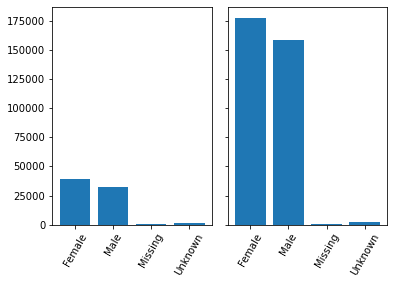

In [176]:
bar_plot(prob_case_sex['sex'], prob_case_sex['count'], conf_case_sex['sex'], conf_case_sex['count'])

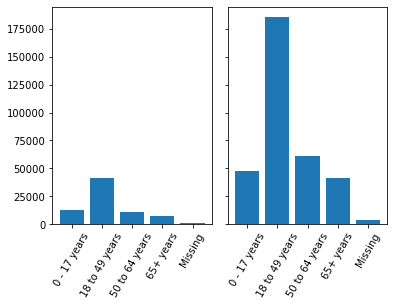

In [177]:
bar_plot(prob_case_age['age_group'], prob_case_age['count'], conf_case_age['age_group'], conf_case_age['count'])

**compare with population percentage of age groups**

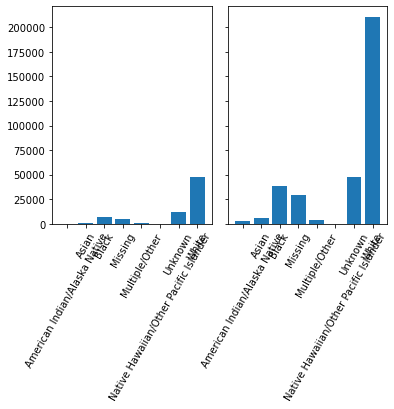

In [178]:
bar_plot(prob_case_race['race'], prob_case_race['count'], conf_case_race['race'], conf_case_race['count'])

In [268]:
#Help from https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p#:~:text=If%20your%20string%20constraint%20is%20not%20just%20one,drop%20all%20rows%20containing%20elements%20of%20your%20list

df_surv1=df_surv[~df_surv.sex.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.age_group.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.race.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.ethnicity.str.contains('|'.join(['Missing','Unknown']))]

### Vaccination trends

Loading in covid vaccination trends csv as df_vacc

In [157]:
df_vacc=pd.read_csv('../data/covid_vaccination_trends.csv', low_memory=False)

In [158]:
df_vacc.shape

(74160, 25)

In [159]:
df_vacc.head()

,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
0,10/12/2022,Report,41,DE,"17,883","2,005,782",NaN,"1,841","839,722",NaN,...,NaN,71.7,"2,245","344,388",NaN,49.3,"4,311","96,891",NaN,42.0
1,10/12/2022,Report,41,CT,"5,733","8,273,306",NaN,"5,198","3,534,406",NaN,...,NaN,81.5,"1,052","1,567,645",NaN,54.0,492,"374,525",NaN,40.4
2,10/12/2022,Report,41,CA,"3,409","81,763,386",NaN,"170,547","33,585,368",NaN,...,NaN,74.1,"-130,515","16,291,249",NaN,55.7,"-40,176","3,578,567",NaN,42.9
3,10/12/2022,Report,41,NE,"21,694","3,489,100",NaN,"1,355","1,396,070",NaN,...,NaN,65.2,"1,835","677,307",NaN,53.7,"4,749","161,952",NaN,40.2
4,10/12/2022,Report,41,PW,152,"49,838",NaN,9,"20,625",NaN,...,NaN,85.4,32,"12,133",NaN,66.0,19,"1,194",NaN,24.7


Locations encompass state/territory/federal entity. 60 unique values. 

In [15]:
df_vacc["Location"].sort_values().unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'US', 'UT', 'VA', 'VI',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [16]:
len(df_vacc["Location"].sort_values().unique())

60

In [17]:
df_vacc.isnull().sum()

Date                                              0
date_type                                         0
MMWR_week                                         0
Location                                          0
Administered_Daily                                0
Administered_Cumulative                           0
Administered_7_Day_Rolling_Average             1020
Admin_Dose_1_Daily                                0
Admin_Dose_1_Cumulative                           0
Admin_Dose_1_Day_Rolling_Average               1020
Administered_Dose1_Pop_Pct                        0
Administered_daily_change_report               6660
Administered_daily_change_report_7dayroll      7740
Series_Complete_Daily                             0
Series_Complete_Cumulative                        0
Series_Complete_Day_Rolling_Average            1020
Series_Complete_Pop_Pct                           0
Booster_Daily                                     0
Booster_Cumulative                                0
Booster_7_Da

In [160]:
df_vacc.dropna(inplace=True)

Dropping "date_type" and "MMWR_week" columns

In [161]:
df_vacc.drop(columns = "date_type", inplace = True)

In [162]:
df_vacc.drop(columns = "MMWR_week", inplace = True)

Deleting the commas in the columns.

In [163]:
# I used the following stackoverflow post to delete the commas in all the columns:
# https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

df_vacc.replace(",", "", regex = True, inplace = True)

Using for loop to change columns from object to float64 dtype:

In [164]:
# I used the following stackoverflow article to convert multiple columns from object into float64:
# https://stackoverflow.com/questions/55833729/how-to-change-datatype-of-multiple-columns-in-pandas

for column in df_vacc.columns[2:]:
    if df_vacc[column].dtype == "object":
        df_vacc[column] = df_vacc[column].astype(np.float64)

I noticed there are negative values in columns that don't have the word "change" in the column name. This doesn't makes sense. I suspect these are typos, so I changed them to positive values by using this for loop:

In [165]:
for column in df_vacc.columns[2:]:
    if "change" in df_vacc[column]:
        pass
    else:
        df_vacc[column] = df_vacc[column].abs()

In [166]:
df_vacc.describe()

,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,Administered_daily_change_report_7dayroll,Series_Complete_Daily,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
count,6.642000e+04,6.642000e+04,6.642000e+04,6.642000e+04,6.642000e+04,6.642000e+04,66420.000000,6.642000e+04,6.642000e+04,6.642000e+04,...,6.642000e+04,66420.000000,6.642000e+04,6.642000e+04,6.642000e+04,66420.000000,6.642000e+04,6.642000e+04,6.642000e+04,66420.000000
mean,3.595863e+04,1.207441e+07,3.577067e+04,1.599666e+04,6.027294e+06,1.582649e+04,53.794680,1.789310e+04,3.577067e+04,1.344609e+04,...,1.339701e+04,44.673245,6.337320e+03,1.179121e+06,6.320002e+03,16.251596,9.957735e+02,4.128483e+04,9.784429e+02,1.862185
std,1.805238e+05,5.257534e+07,1.715154e+05,1.515108e+05,2.560373e+07,9.827854e+04,25.899333,1.305834e+05,1.715154e+05,1.385771e+05,...,8.878831e+04,24.339396,5.173903e+04,7.319775e+06,4.637529e+04,20.465388,4.777585e+04,5.180223e+05,2.020102e+04,5.726777
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.179000e+03,7.279488e+05,2.053000e+03,2.550000e+02,3.976322e+05,4.160000e+02,39.100000,0.000000e+00,2.053000e+03,1.460000e+02,...,2.670000e+02,29.100000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.395000e+03,2.880755e+06,7.801000e+03,1.699500e+03,1.548714e+06,2.254500e+03,59.850000,0.000000e+00,7.801000e+03,1.199000e+03,...,1.585000e+03,51.600000,0.000000e+00,5.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,2.021550e+04,7.951898e+06,2.058100e+04,7.121250e+03,4.023175e+06,7.594250e+03,71.800000,6.823000e+03,2.058100e+04,5.564000e+03,...,5.916000e+03,62.000000,1.298250e+03,5.802575e+05,1.682000e+03,37.800000,3.000000e+00,1.450000e+02,5.000000e+00,0.300000
max,4.787054e+06,5.961645e+08,3.502988e+06,3.015052e+07,2.598709e+08,5.011136e+06,100.000000,4.567102e+06,3.502988e+06,2.870943e+07,...,4.837589e+06,88.800000,2.748886e+06,1.057888e+08,1.257266e+06,64.500000,1.183530e+07,1.706439e+07,1.855467e+06,37.600000


The dataset covers time period 12/2020 to 06/2022, with 556 unique dates:

In [12]:
len(df_vacc["Date"].sort_values().unique())

556

In [13]:
df_vacc.tail()

,Date,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
74155,12/13/2020,DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74156,12/13/2020,FL,820.0,820.0,820.0,836.0,836.0,836.0,0.0,820.0,...,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74157,12/13/2020,MS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74158,12/13/2020,OK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74159,12/13/2020,GU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_vacc.head()

,Date,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
7740,06/21/2022,ND,509.0,1131991.0,438.0,91.0,504634.0,74.0,66.2,509.0,...,52.0,56.3,120.0,189296.0,96.0,44.1,193.0,18578.0,177.0,15.2
7741,06/21/2022,CA,40018.0,77624034.0,35217.0,6980.0,32940724.0,4604.0,83.4,40018.0,...,3597.0,72.9,11490.0,15518543.0,11000.0,53.9,15935.0,2512239.0,14385.0,31.1
7742,06/21/2022,IA,2539.0,5276550.0,2036.0,365.0,2159525.0,214.0,68.4,2539.0,...,186.0,62.6,484.0,1065873.0,418.0,54.0,1408.0,202036.0,1168.0,28.8
7743,06/21/2022,AR,2027.0,4363089.0,1616.0,356.0,2036932.0,295.0,67.5,2027.0,...,221.0,55.2,462.0,683622.0,382.0,41.1,876.0,108487.0,677.0,23.3
7744,06/21/2022,MI,6310.0,16386296.0,5279.0,895.0,6743028.0,652.0,67.5,6310.0,...,554.0,60.8,1543.0,3360001.0,1328.0,55.4,3132.0,597299.0,2627.0,27.7


Converting df_vacc["Date"] into a pandas datetime

In [167]:
df_vacc["Date"] = pd.to_datetime(df_vacc["Date"])

Setting df_vacc["Date"] as the index, and sorting the index:

In [168]:
df_vacc.set_index("Date", inplace = True)

In [169]:
df_vacc.sort_index(inplace = True)

Filter to include information from only the states/territories, not entire US:

In [142]:
df_vacc_states = df_vacc[df_vacc["Location"] != "US"].copy()

## The total number of doses administered daily in the US:

In [18]:
df_vacc_states.groupby("Date")["Administered_Daily"].sum()

Date
2020-12-13     38908.0
2020-12-14      5195.0
2020-12-15     58605.0
2020-12-16    194437.0
2020-12-17    340526.0
                ...   
2022-06-17    296294.0
2022-06-18    130370.0
2022-06-19     61971.0
2022-06-20    233034.0
2022-06-21    267202.0
Name: Administered_Daily, Length: 556, dtype: float64

Converting groupby results into a dataframe to properly plot results:

In [33]:
a = df_vacc_states.groupby("Date")["Administered_Daily"].sum()
daily_total_doses = a.to_frame()

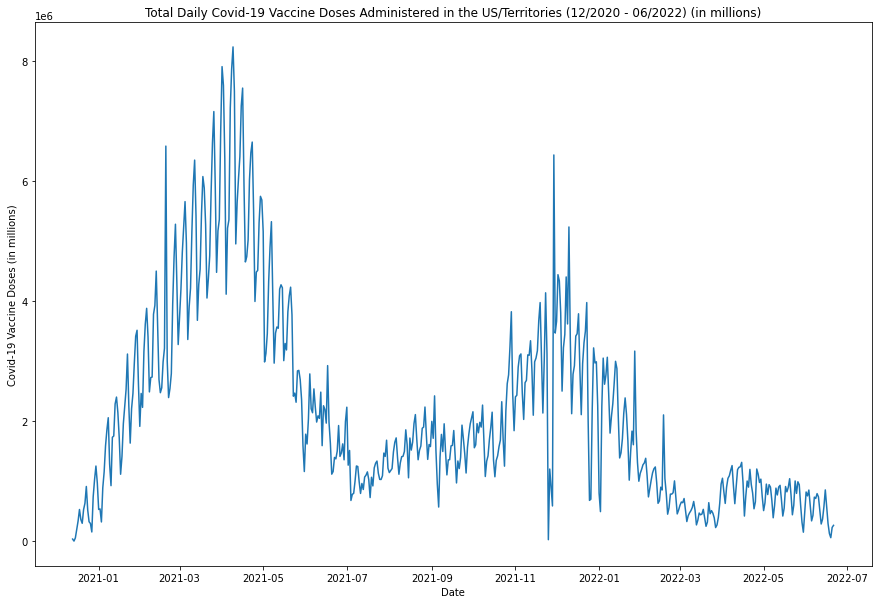

In [34]:
plt.figure(figsize = (15,10))
plt.plot(daily_total_doses.index, daily_total_doses["Administered_Daily"])
plt.xlabel("Date")
plt.ylabel("Covid-19 Vaccine Doses (in millions)")
plt.title("Total Daily Covid-19 Vaccine Doses Administered in the US/Territories (12/2020 - 06/2022) (in millions)");


'''
taken from https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_vacc_states, x = df_vacc_states.index, y = 'Administered_Daily',
                  hue='Location', palette='viridis',
                  legend='full', lw=3)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Covid-19 Vaccine Doses (in millions)')
plt.xlabel('Date')
plt.show()
'''

# Filtering the data into include only the states in the Northeast. 

Initial observations:

- About 52% of the pop in the Northeast have received an additional booster in addition to completing the primary series.(see graph)

- 28% of people 50 or older have received the second covid booster (see graph)

In [148]:
# I used the following stackoverflow post to filter by multiple states:
# https://stackoverflow.com/questions/35164019/filter-multiple-values-using-pandas

ne_states = ["CT", "RI", "MA", "VT", "NH", "ME", "NY", "PA", "NJ"]

df_vacc_ne = df_vacc_states[df_vacc_states["Location"].isin(ne_states)]

In [21]:
#df_vacc_ne.resample("W").sum().plot();

Resampling df_vacc_ne by "W" and focusing on the "Administered_Daily" column, then turning it into a dataframe to plot

In [22]:
b = df_vacc_ne.resample("W").sum()["Administered_Daily"]

In [23]:
weekly_total_doses_NE = b.to_frame()

Plot of Total Weekly Covid-19 Vaccine Doses Administered in the Northeast (12/2020 - 06/2022) (in millions)"

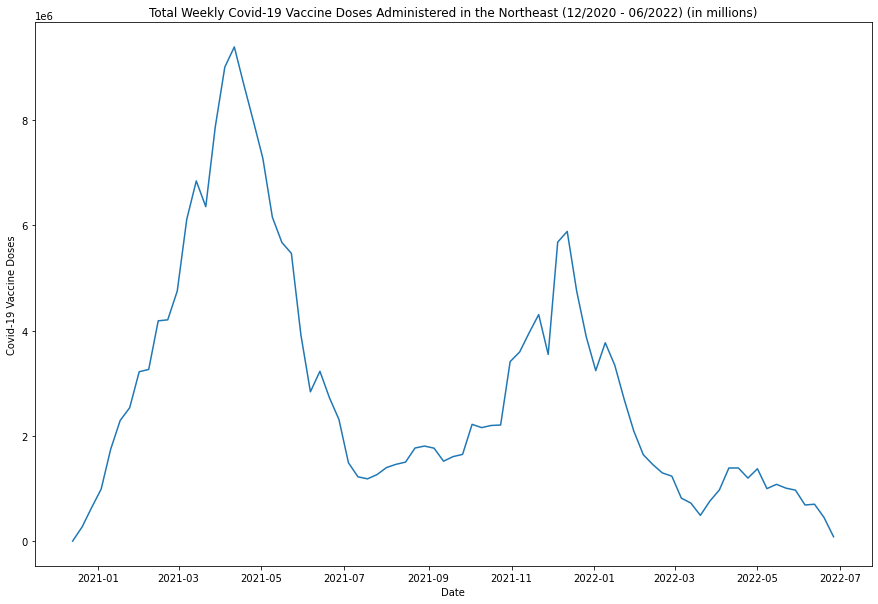

In [24]:
plt.figure(figsize = (15,10)) # resample for weekly
plt.plot(weekly_total_doses_NE.index, weekly_total_doses_NE["Administered_Daily"])
plt.xlabel("Date")
plt.ylabel("Covid-19 Vaccine Doses")
plt.title("Total Weekly Covid-19 Vaccine Doses Administered in the Northeast (12/2020 - 06/2022) (in millions)");

Resampling df_vacc_ne by "W", getting the weekly average of "Additional_Doses_Vax_Pct" column, then turning it into a dataframe to plot.
- About 52% of the pop in the Northeast have received an additional booster in addition to completing the primary series.

In [40]:
c = df_vacc_ne.resample("W")["Additional_Doses_Vax_Pct"].mean()

In [41]:
weekly_addit_doses_pct_NE = c.to_frame()

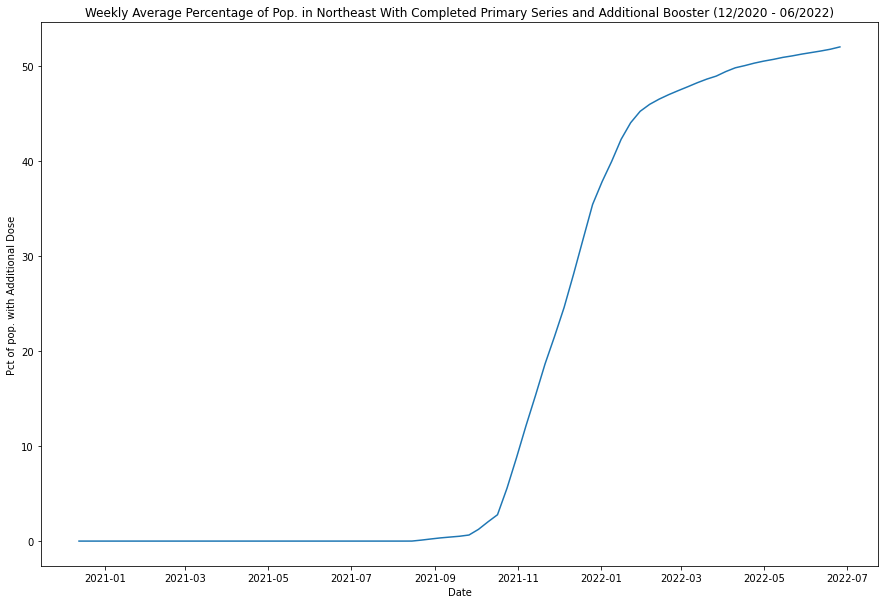

In [42]:
plt.figure(figsize = (15,10))
plt.plot(weekly_addit_doses_pct_NE.index, weekly_addit_doses_pct_NE["Additional_Doses_Vax_Pct"])
plt.xlabel("Date")
plt.ylabel("Pct of pop. with Additional Dose")
plt.title("Weekly Average Percentage of Pop. in Northeast With Completed Primary Series and Additional Booster (12/2020 - 06/2022)");

Resampling df_vacc_ne by "W", getting the weekly average of "Second_Booster_50Plus_Vax_Pct" column, then turning it into a dataframe to plot. 
- 28% of people 50 or older have received the second covid booster

In [59]:
d = df_vacc_ne.resample("W")["Second_Booster_50Plus_Vax_Pct"].mean()

In [60]:
weekly_second_boost_50plus_pct_NE = d.to_frame()

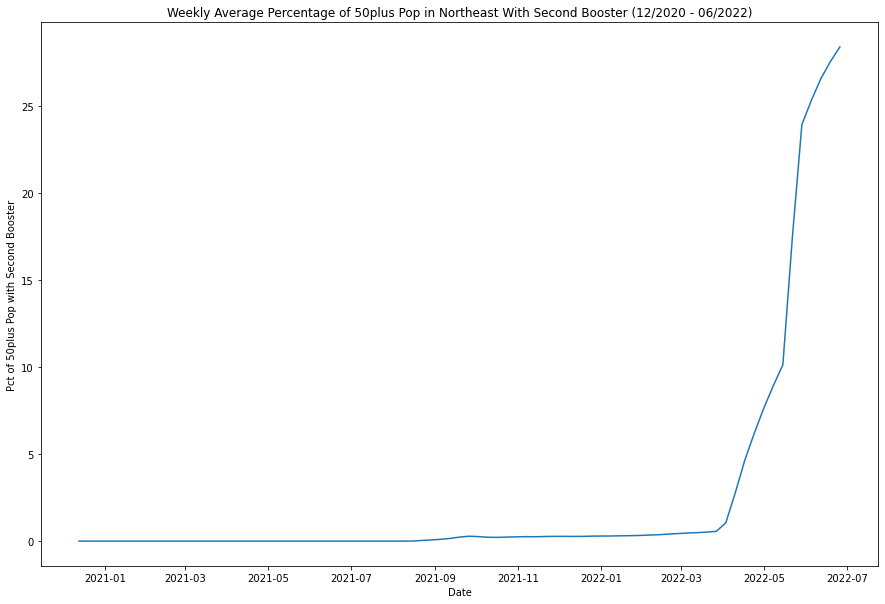

In [61]:
plt.figure(figsize = (15,10)) 
plt.plot(weekly_second_boost_50plus_pct_NE.index, weekly_second_boost_50plus_pct_NE["Second_Booster_50Plus_Vax_Pct"])
plt.xlabel("Date")
plt.ylabel("Pct of 50plus Pop with Second Booster")
plt.title("Weekly Average Percentage of 50plus Pop in Northeast With Second Booster (12/2020 - 06/2022)");

In [49]:
weekly_second_boost_50plus_pct["Second_Booster_50Plus_Vax_Pct"].sort_values(ascending = False)

Date
2022-06-26    28.411111
2022-06-19    27.567677
2022-06-12    26.587302
2022-06-05    25.338889
2022-05-29    23.940476
                ...    
2021-05-30     0.000000
2021-05-23     0.000000
2021-05-16     0.000000
2020-12-20     0.000000
2020-12-13     0.000000
Name: Second_Booster_50Plus_Vax_Pct, Length: 81, dtype: float64

# Filtering the data into include only the states in the Midwest


Initial observations:
- About 51% of the pop in the midwest have completed a primary series as well as a booster
- About 26% of the 50plus Pop in the Midwest have received a second booster


In [129]:
midwest_states = ["MI", "OH", "IN", "IL", "WI", "MN", "IA", "MO", "KS", "NE", "SD", "ND"]

df_vacc_midwest = df_vacc_states[df_vacc_states["Location"].isin(midwest_states)]

In [26]:
d = df_vacc_midwest.resample("W").sum()["Administered_Daily"]
weekly_total_doses_midwest = d.to_frame()

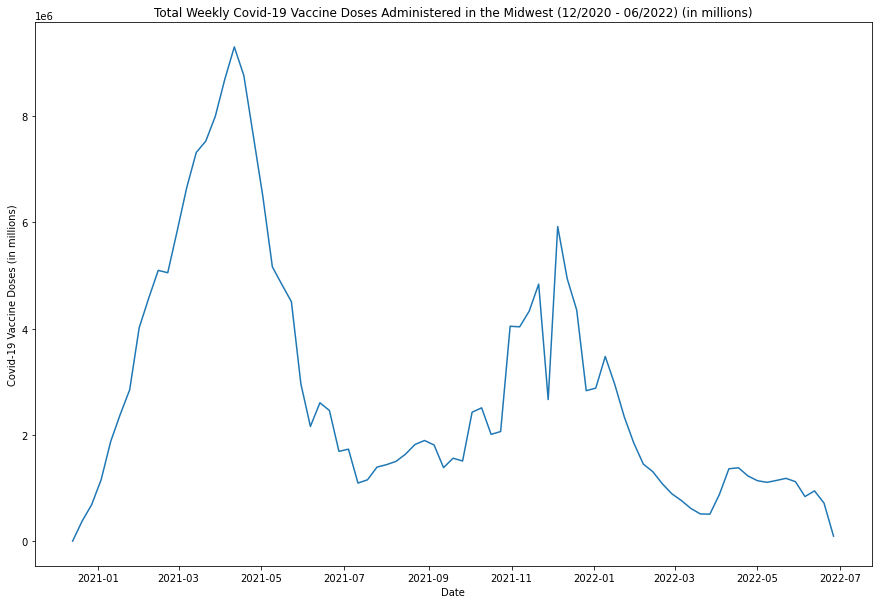

In [27]:
plt.figure(figsize = (15,10))
plt.plot(weekly_total_doses_midwest.index, weekly_total_doses_midwest["Administered_Daily"])
plt.xlabel("Date")
plt.ylabel("Covid-19 Vaccine Doses (in millions)")
plt.title("Total Weekly Covid-19 Vaccine Doses Administered in the Midwest (12/2020 - 06/2022) (in millions)");

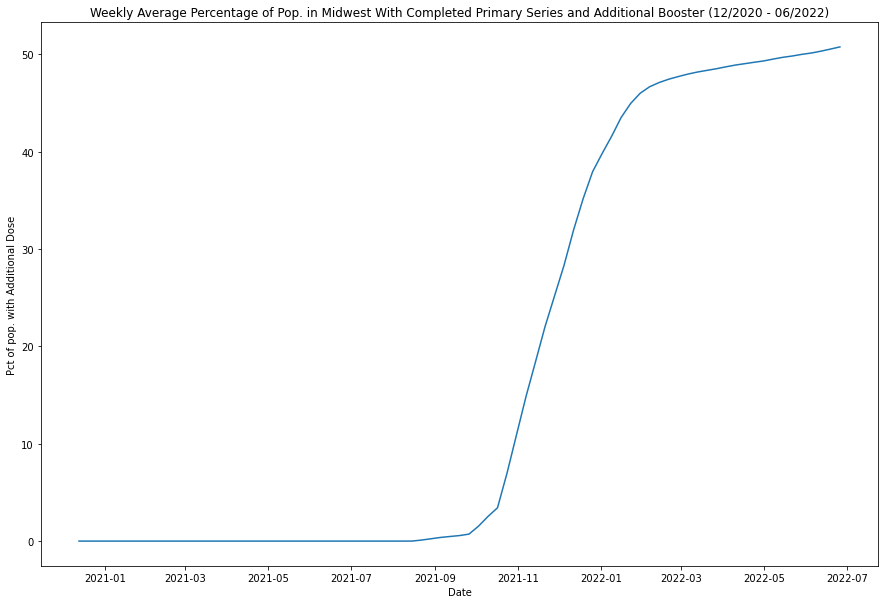

In [28]:
e = df_vacc_midwest.resample("W")["Additional_Doses_Vax_Pct"].mean()
weekly_addit_doses_pct_midwest = e.to_frame()

plt.figure(figsize = (15,10))
plt.plot(weekly_addit_doses_pct_midwest.index, weekly_addit_doses_pct_midwest["Additional_Doses_Vax_Pct"])
plt.xlabel("Date")
plt.ylabel("Pct of pop. with Additional Dose")
plt.title("Weekly Average Percentage of Pop. in Midwest With Completed Primary Series and Additional Booster (12/2020 - 06/2022)");

In [35]:
weekly_addit_doses_pct_midwest["Additional_Doses_Vax_Pct"].sort_values(ascending = False)

Date
2022-06-26    50.758333
2022-06-19    50.534091
2022-06-12    50.318452
2022-06-05    50.130357
2022-05-29    49.993452
                ...    
2021-05-30     0.000000
2021-05-23     0.000000
2021-05-16     0.000000
2021-05-09     0.000000
2020-12-13     0.000000
Name: Additional_Doses_Vax_Pct, Length: 81, dtype: float64

- Midwest state with the lowest pct. of pop with a completed primary series as well as additional booster: South Dakota, 43%

- Midwest state with the highest pct. of pop with a completed primary series as well as additional booster: Minnesota, 59%

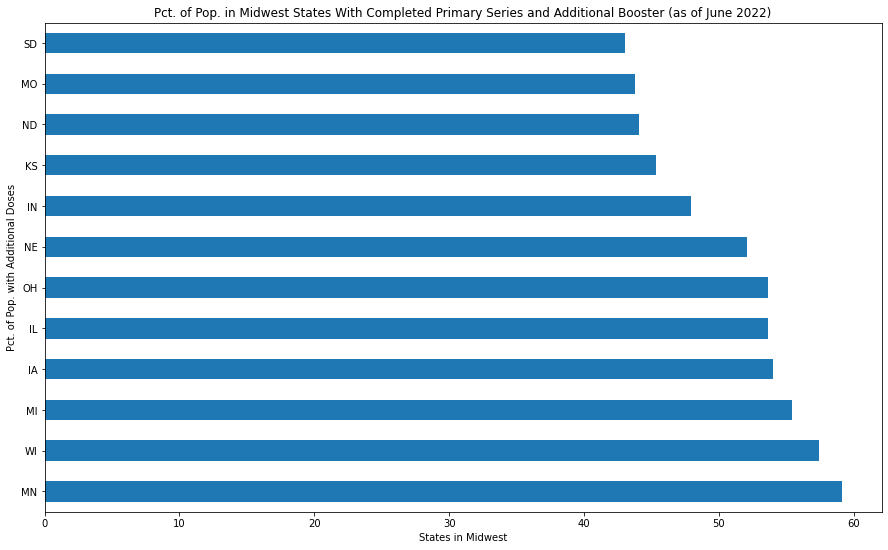

In [138]:
# need to change to bar graph, 

plt.figure(figsize = (15,9))
df_vacc_midwest.groupby("Location")["Additional_Doses_Vax_Pct"].max().sort_values(ascending = False).plot(kind = "barh")
plt.xlabel("States in Midwest")
plt.ylabel("Pct. of Pop. with Additional Doses")
plt.title("Pct. of Pop. in Midwest States With Completed Primary Series and Additional Booster (as of June 2022)");


- About 26% of the 50plus Pop in the Midwest have received a second booster

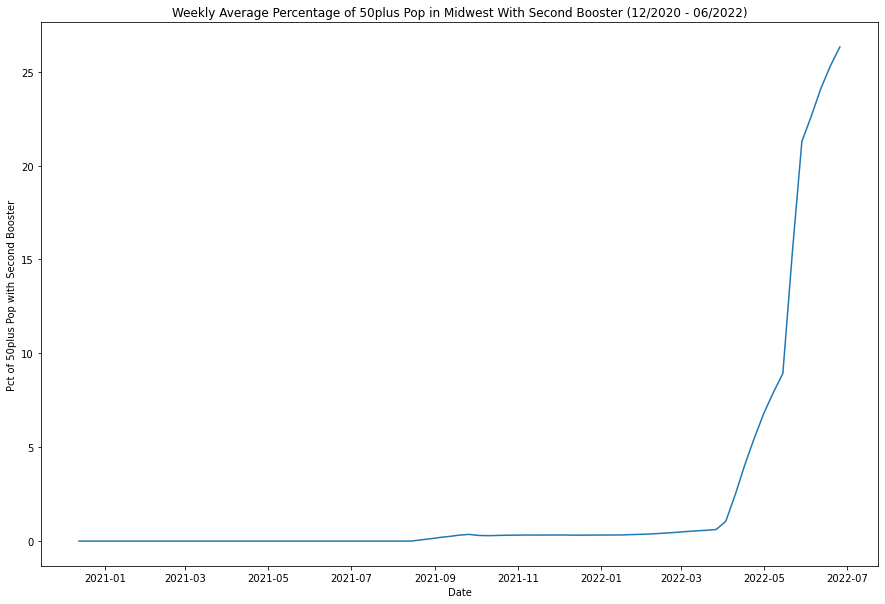

In [29]:
f = df_vacc_midwest.resample("W")["Second_Booster_50Plus_Vax_Pct"].mean()
weekly_second_boost_50plus_pct_midwest = f.to_frame()
plt.figure(figsize = (15,10)) 
plt.plot(weekly_second_boost_50plus_pct_midwest.index, weekly_second_boost_50plus_pct_midwest["Second_Booster_50Plus_Vax_Pct"])
plt.xlabel("Date")
plt.ylabel("Pct of 50plus Pop with Second Booster")
plt.title("Weekly Average Percentage of 50plus Pop in Midwest With Second Booster (12/2020 - 06/2022)");

In [36]:
weekly_second_boost_50plus_pct_midwest["Second_Booster_50Plus_Vax_Pct"].sort_values(ascending = False)

Date
2022-06-26    26.316667
2022-06-19    25.307576
2022-06-12    24.106548
2022-06-05    22.641667
2022-05-29    21.276786
                ...    
2021-05-23     0.000000
2021-05-16     0.000000
2021-05-09     0.000000
2021-05-02     0.000000
2020-12-13     0.000000
Name: Second_Booster_50Plus_Vax_Pct, Length: 81, dtype: float64

- Midwest state with lowest pct of age 50-plus pop. with a second booster: North Dakota, 15%
- Midwest state with highest pct of age 50-plus pop. with a second booster: Minnesota, 36%


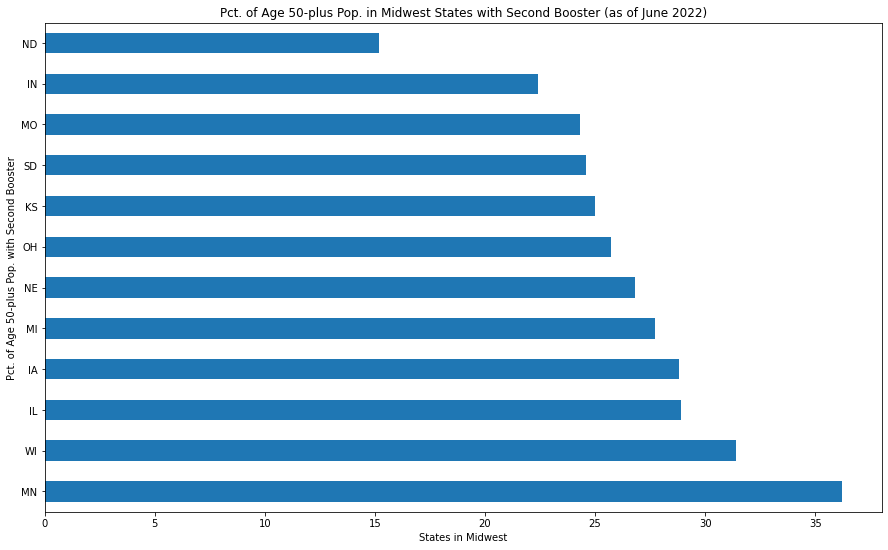

In [139]:
#change to bar graph

plt.figure(figsize = (15,9))
df_vacc_midwest.groupby("Location")["Second_Booster_50Plus_Vax_Pct"].max().sort_values(ascending = False).plot(kind = "barh")
plt.xlabel("States in Midwest")
plt.ylabel("Pct. of Age 50-plus Pop. with Second Booster")
plt.title("Pct. of Age 50-plus Pop. in Midwest States with Second Booster (as of June 2022)");

In [115]:
df_vacc_midwest.groupby("Location")["Second_Booster_50Plus_Vax_Pct"].max().sort_values(ascending = False)

Location
MN    36.2
WI    31.4
IL    28.9
IA    28.8
MI    27.7
NE    26.8
OH    25.7
KS    25.0
SD    24.6
MO    24.3
IN    22.4
ND    15.2
Name: Second_Booster_50Plus_Vax_Pct, dtype: float64

# What are initial vaccine-related observations for states in the South?


Initial observations:

- About 42% of the pop. in the South have a complete primary series as well as a booster

- About 23% of the 50plus Pop in the South have received a second booster

- North Carolina is the Southern state with lowest pct. of pop with a completed primary series and additional booster: 28% as of June 2022

- Maryland is the Southern state with highest pct. of pop with a completed primary series and additional booster: 53% as of June 2022, and the highest pct. of age 50-plus pop. with a second booster: 34% as of June 2022

- Alabama is the Southern state with lowest pct of age 50-plus pop.: 17% as of June 2022


In [143]:
south_states = ["DE", "FL", "GA", "MD", "NC", "SC", "VA", "DC", "WV", "AL", "KY", "MS", "TN", "AR", "LA", "OK", "TX"]

df_vacc_south = df_vacc_states[df_vacc_states["Location"].isin(south_states)]

In [144]:
d = df_vacc_south.resample("W").sum()["Administered_Daily"]
weekly_total_doses_south = d.to_frame()

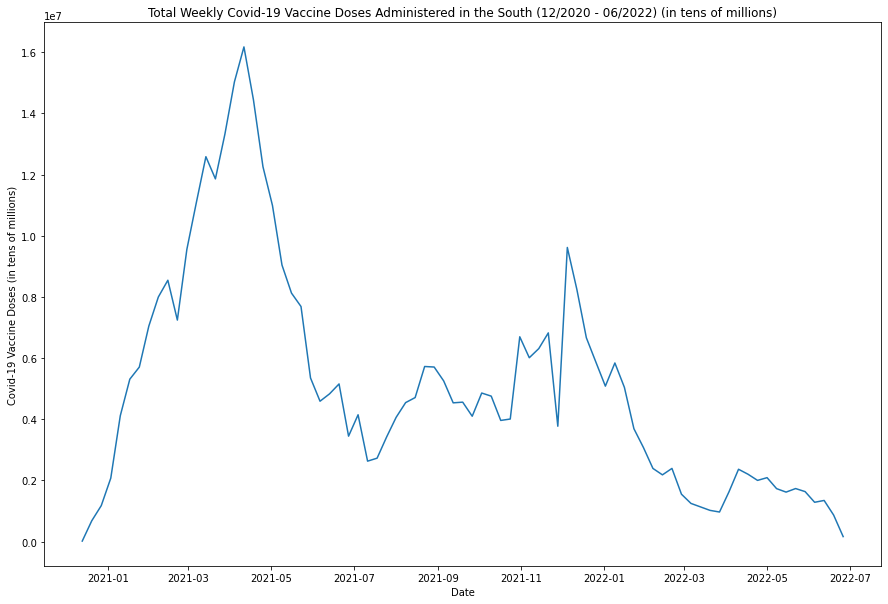

In [145]:
plt.figure(figsize = (15,10))
plt.plot(weekly_total_doses_south.index, weekly_total_doses_south["Administered_Daily"])
plt.xlabel("Date")
plt.ylabel("Covid-19 Vaccine Doses (in tens of millions)")
plt.title("Total Weekly Covid-19 Vaccine Doses Administered in the South (12/2020 - 06/2022) (in tens of millions)");

In [41]:
weekly_total_doses_south["Administered_Daily"].sort_values(ascending = True)

Date
2020-12-13       18439.0
2022-06-26      165300.0
2020-12-20      682243.0
2022-06-19      868702.0
2022-03-27      968796.0
                 ...    
2021-03-14    12584469.0
2021-03-28    13323958.0
2021-04-18    14442032.0
2021-04-04    15031107.0
2021-04-11    16173153.0
Name: Administered_Daily, Length: 81, dtype: float64

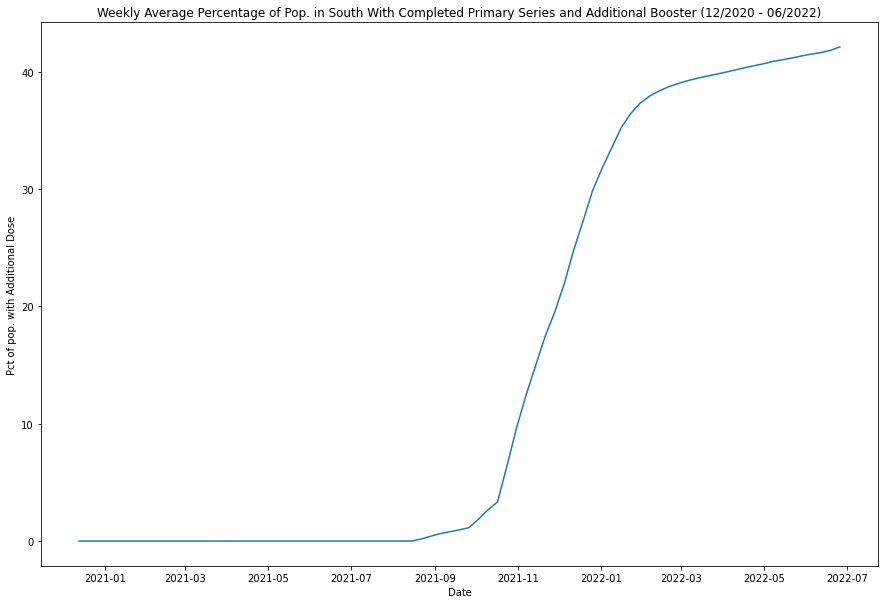

In [45]:
e = df_vacc_south.resample("W")["Additional_Doses_Vax_Pct"].mean()
weekly_addit_doses_pct_south = e.to_frame()

plt.figure(figsize = (15,10))
plt.plot(weekly_addit_doses_pct_south.index, weekly_addit_doses_pct_south["Additional_Doses_Vax_Pct"])
plt.xlabel("Date")
plt.ylabel("Pct of pop. with Additional Dose")
plt.title("Weekly Average Percentage of Pop. in South With Completed Primary Series and Additional Booster (12/2020 - 06/2022)");

In [47]:
weekly_addit_doses_pct_south["Additional_Doses_Vax_Pct"].sort_values(ascending = False)

Date
2022-06-26    42.129412
2022-06-19    41.831551
2022-06-12    41.642857
2022-06-05    41.513445
2022-05-29    41.365546
                ...    
2021-03-07     0.000000
2021-03-14     0.000000
2021-03-21     0.000000
2021-03-28     0.000000
2020-12-13     0.000000
Name: Additional_Doses_Vax_Pct, Length: 81, dtype: float64

- Southern state with lowest pct. of pop with a completed primary series and additional booster: North Carolina, 28%
- Southern state with highest pct. of pop with a completed primary series and additional booster: Maryland, 53%


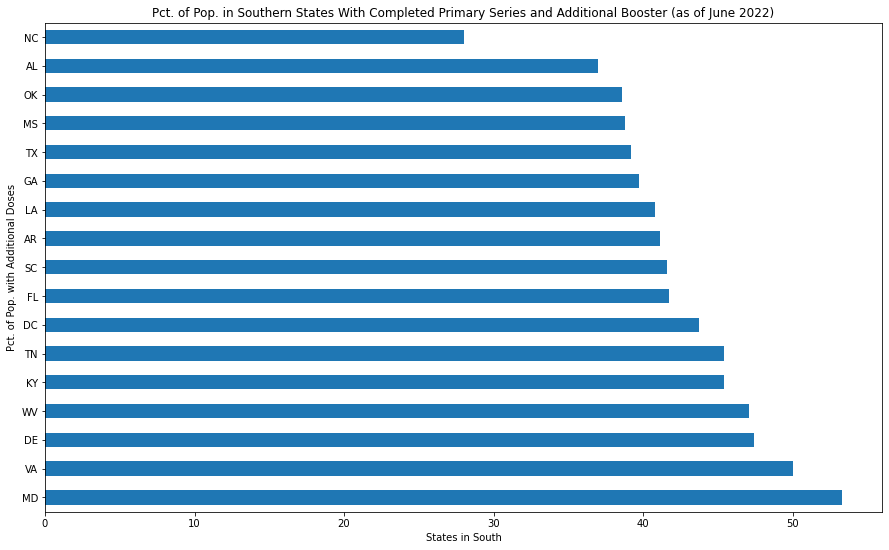

In [146]:
#change to bar graph
plt.figure(figsize = (15,9))
df_vacc_south.groupby("Location")["Additional_Doses_Vax_Pct"].max().sort_values(ascending = False).plot(kind = "barh")
plt.xlabel("States in South")
plt.ylabel("Pct. of Pop. with Additional Doses")
plt.title("Pct. of Pop. in Southern States With Completed Primary Series and Additional Booster (as of June 2022)");

In [113]:
df_vacc_south.groupby("Location")["Additional_Doses_Vax_Pct"].max().sort_values(ascending = False)

Location
MD    53.3
VA    50.0
DE    47.4
WV    47.1
KY    45.4
TN    45.4
DC    43.7
FL    41.7
SC    41.6
AR    41.1
LA    40.8
GA    39.7
TX    39.2
MS    38.8
OK    38.6
AL    37.0
NC    28.0
Name: Additional_Doses_Vax_Pct, dtype: float64

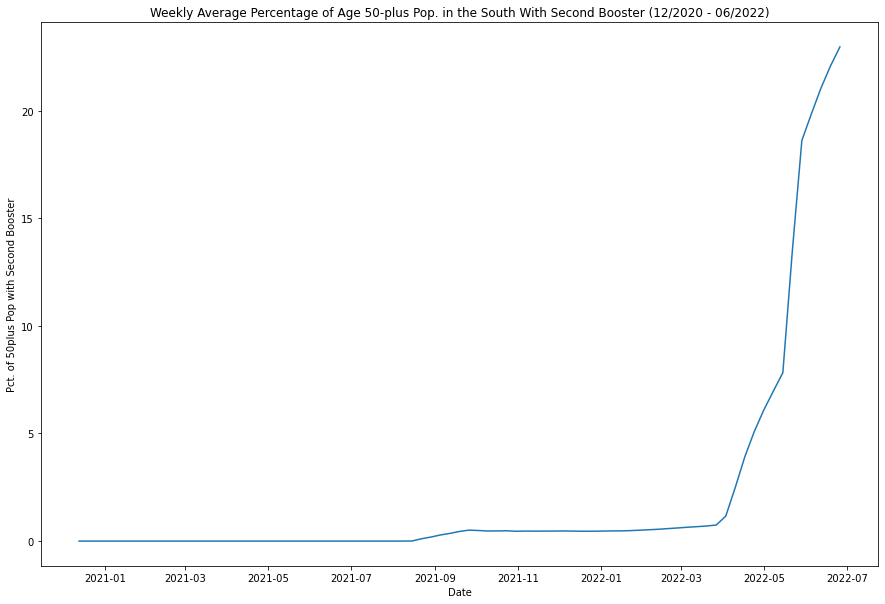

In [101]:
f = df_vacc_south.resample("W")["Second_Booster_50Plus_Vax_Pct"].mean()
weekly_second_boost_50plus_pct_south = f.to_frame()
plt.figure(figsize = (15,10)) 
plt.plot(weekly_second_boost_50plus_pct_south.index, weekly_second_boost_50plus_pct_south["Second_Booster_50Plus_Vax_Pct"])
plt.xlabel("Date")
plt.ylabel("Pct. of 50plus Pop with Second Booster")
plt.title("Weekly Average Percentage of Age 50-plus Pop. in the South With Second Booster (12/2020 - 06/2022)");

In [49]:
weekly_second_boost_50plus_pct_south["Second_Booster_50Plus_Vax_Pct"].sort_values(ascending = False)

Date
2022-06-26    22.964706
2022-06-19    22.068449
2022-06-12    21.040756
2022-06-05    19.852941
2022-05-29    18.617647
                ...    
2021-05-30     0.000000
2021-05-23     0.000000
2021-05-16     0.000000
2021-05-09     0.000000
2020-12-13     0.000000
Name: Second_Booster_50Plus_Vax_Pct, Length: 81, dtype: float64

- Southern state with lowest pct of age 50-plus pop. with a second booster: Alabama, 17%
- Southern state with highest pct of age 50-plus pop. with a second booster: Maryland, 34%


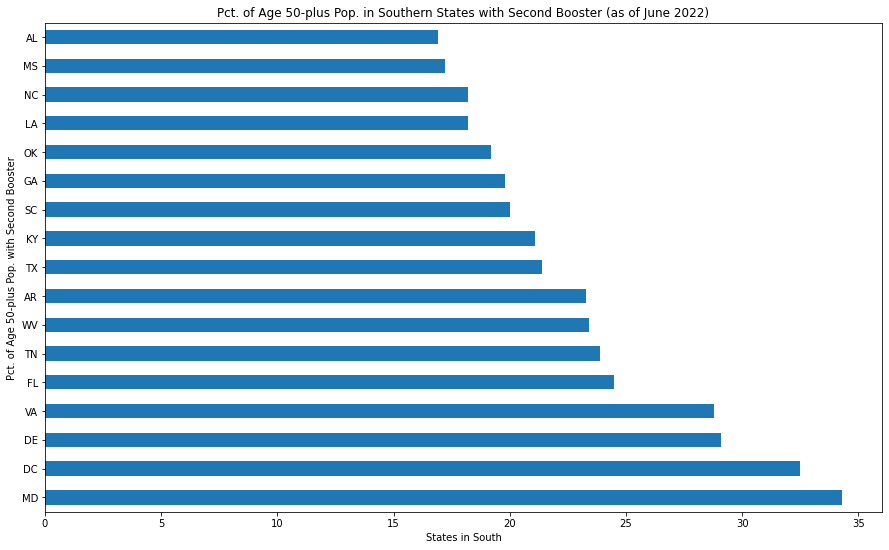

In [147]:

plt.figure(figsize = (15,9))
df_vacc_south.groupby("Location")["Second_Booster_50Plus_Vax_Pct"].max().sort_values(ascending = False).plot(kind = "barh")
plt.xlabel("States in South")
plt.ylabel("Pct. of Age 50-plus Pop. with Second Booster")
plt.title("Pct. of Age 50-plus Pop. in Southern States with Second Booster (as of June 2022)");

In [77]:
df_vacc_south.groupby("Location")["Second_Booster_50Plus_Vax_Pct"].max().sum() / 17
    

23.047058823529408

In [112]:
df_vacc_south.groupby("Location")["Second_Booster_50Plus_Vax_Pct"].max().sort_values(ascending = False)

Location
MD    34.3
DC    32.5
DE    29.1
VA    28.8
FL    24.5
TN    23.9
WV    23.4
AR    23.3
TX    21.4
KY    21.1
SC    20.0
GA    19.8
OK    19.2
LA    18.2
NC    18.2
MS    17.2
AL    16.9
Name: Second_Booster_50Plus_Vax_Pct, dtype: float64

# Which states have the lowest and highest percentage of population who have completed the COVID-19 primary series vaccine as well as a booster?

In [156]:
df_vacc.groupby("Location")["Additional_Doses_Vax_Pct"].max().sort_values(ascending = True)

Location
NC    28.0
VI    31.7
FM    33.8
AL    37.0
MH    37.6
OK    38.6
MS    38.8
TX    39.2
GA    39.7
NV    40.0
LA    40.8
AR    41.1
SC    41.6
FL    41.7
SD    43.0
DC    43.7
MO    43.8
PA    43.9
AZ    43.9
ND    44.1
WY    44.6
ID    44.9
KS    45.3
TN    45.4
KY    45.4
AK    46.0
UT    46.1
NY    46.6
WV    47.1
DE    47.4
US    47.5
IN    47.9
NH    48.1
NJ    49.0
MT    49.1
GU    49.6
MP    49.7
VA    50.0
NM    51.3
NE    52.1
MA    52.6
CT    52.8
MD    53.3
OH    53.6
IL    53.6
CA    53.9
IA    54.0
CO    54.1
WA    54.6
OR    55.1
RI    55.2
MI    55.4
HI    56.3
AS    56.3
WI    57.4
ME    57.6
MN    59.1
PR    61.4
VT    62.4
PW    64.5
Name: Additional_Doses_Vax_Pct, dtype: float64

Loading the covid_vaccination_trends_clean.csv as df_vacc

In [153]:
df_vacc = pd.read_csv("../data/clean_data/covid_vaccination_trends_clean.csv")

Saving df_vacc as covid_vaccination_trends_clean.csv

In [170]:
df_vacc.to_csv('../data/clean_data/covid_vaccination_trends_clean.csv')

In [ ]:
#test